# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

首先明确一下有哪些自变量可以用于训练我们的预测模型：`pclass`、`sex`、`Age`、`fare`、`embarked`以及由同伴数量和同乘父母或者孩子组成的命名为`relative`的变量。

# 数据导入

In [1]:
import numpy as np
import pandas as pd

In [2]:
original_data = pd.read_csv("D:\\练习\\项目实战 _ 用逻辑回归预测泰坦尼克号幸存情况\\titanic_train.csv")
original_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 数据分析和清理

首先新建一个新表`cleaned_original_data`，将对原始数据所做的清理都在新表上进行。

In [3]:
cleaned_original_data = original_data.copy()

将同伴数量和同乘的父母或者孩子的数量相加，并将其命名为`relative` ，且成为一个新变量。

In [4]:
cleaned_original_data['relative'] = cleaned_original_data['SibSp'] + cleaned_original_data['Parch']
cleaned_original_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relative
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### 数据的整齐度

In [5]:
cleaned_original_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relative
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,0
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S,0
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,0
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S,1
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S,0


从输出结果可以看出，该数据满足每一行为一个观察值，每一列为一个变量，以及每一个单元格为一个值的要求，因此该表格无需对格式进行清理。

#### 数据的干净度

对表格重复数据的分析

In [6]:
cleaned_original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  relative     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


从上面的输出结果来看，该表格一共包含891个观察值。      
其中`Age`、`Cabin`、 `Embarked` 变量的数据存在缺失，     
考虑到`Age`和`Cabin`对后期的预测分析没有影响，因此缺失的数据可以不用清理。    


查看一下`Embarked`缺失的观察值。

In [7]:
cleaned_original_data[cleaned_original_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relative
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


共有两个观察值缺少`Embarked`的数据，因此可以考虑去除这两列的数据。

In [8]:
cleaned_original_data = cleaned_original_data.dropna(subset=['Embarked'])

In [9]:
cleaned_original_data['Embarked'].isnull().sum()

0

对表格重复数据的分析

通过`PassengerId`查看是否有乘客ID重复的数据。

In [10]:
cleaned_original_data['PassengerId'].duplicated().sum()

0

根据返回的结果，该数据没有重复的数据。

对表格不一致数据的分析

表格中没有可能存在不一致数据的变量

对表格中无效数据的分析

In [11]:
cleaned_original_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,relative
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.906637
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504,1.614703
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


从输出结果来看，表格中的数据不存在无效数据。

#### 保存清理过后的数据

In [12]:
cleaned_original_data.to_csv("D:\\练习\\项目实战 _ 用逻辑回归预测泰坦尼克号幸存情况\\cleaned_titanic_train.csv", index=False)

# 探索数据

在着手逻辑回归分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与乘客是否幸存存在相关性的变量，为后续的进一步分析提供方向。

In [74]:
import matplotlib.pyplot as plt

In [75]:
import seaborn as sns

设置图片的大小以及色调

In [114]:
sns.set_palette('Set3')

In [115]:
plt.rcParams["figure.figsize"] = [7.00, 3.5]
plt.rcParams["figure.autolayout"] = True

#### 幸存者的比例

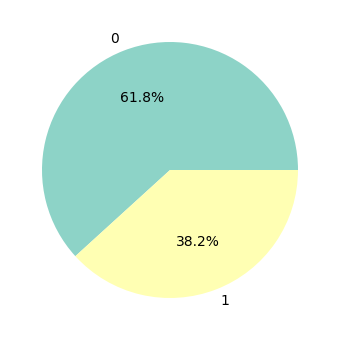

In [116]:
value_counts = cleaned_original_data['Survived'].value_counts()
survived_labels = value_counts.index
plt.pie(value_counts, labels=survived_labels, autopct='%.1f%%')
plt.show()

从饼图上看，泰坦尼克号上的遇难者多于幸存者，比例约为3:2。

#### 乘客的年龄

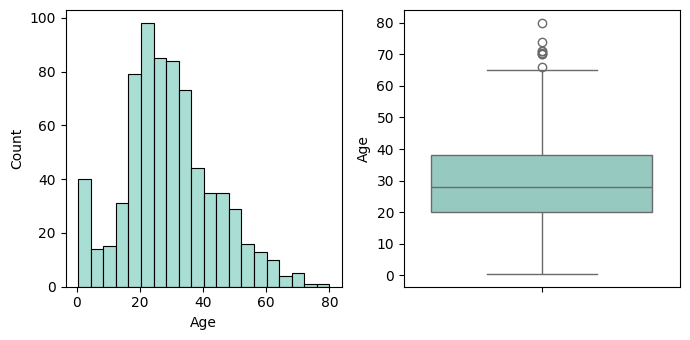

In [117]:
fig, axes = plt.subplots(1,2)
sns.histplot(cleaned_original_data['Age'], ax=axes[0])
sns.boxplot(cleaned_original_data['Age'], ax=axes[1])
plt.show()

大多数乘客位于20-30岁之间。

#### 乘客年龄与是否幸存

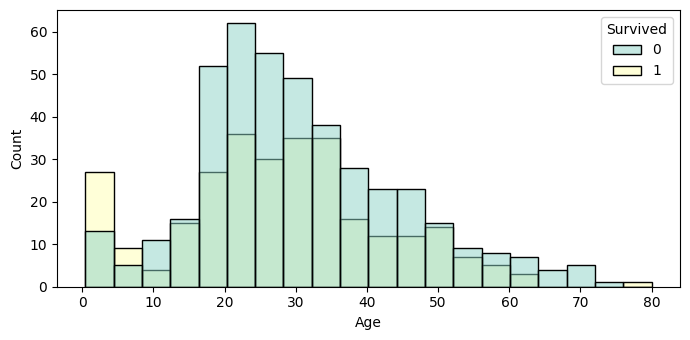

In [118]:
sns.histplot(cleaned_original_data, x='Age', hue='Survived')
plt.show()

根据返回的结果显示，只有0-10岁之间的乘客存活概率更高。

#### 船票金额分布

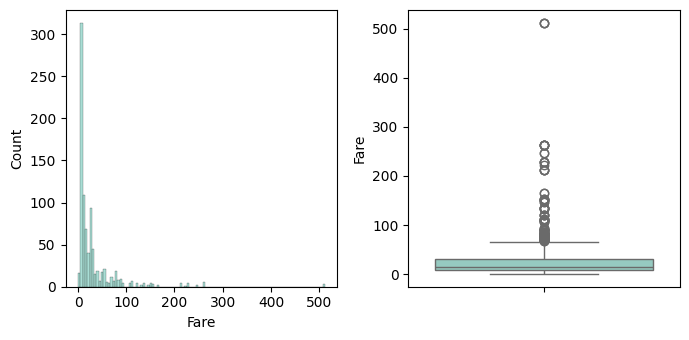

In [123]:
fig, axes = plt.subplots(1, 2)
sns.histplot(cleaned_original_data, x='Fare', ax=axes[0])
sns.boxplot(cleaned_original_data['Fare'], ax=axes[1])
plt.show()

票价呈现右正态分布，且大部分的票价中等，但是也存在极高的票价，拉高平均值。

#### 船票金额与幸存者的关系

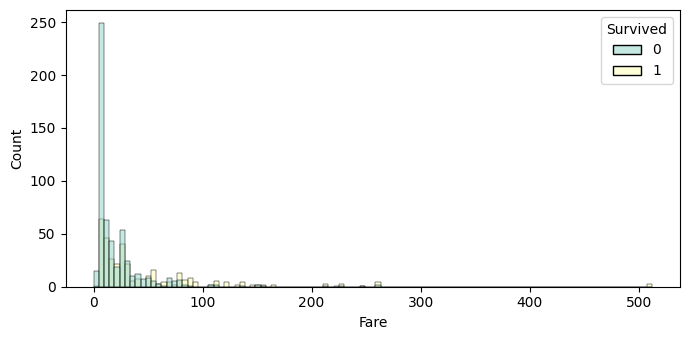

In [124]:
sns.histplot(cleaned_original_data, x='Fare', hue='Survived')
plt.show()

根据分析结果显示，购买普通票的乘客死亡的概率更高，而随着票价的提高，乘客的死亡率也逐渐降低。

#### 船舱等级与幸存者的关系

In [169]:
Pclass_count = cleaned_original_data['Pclass'].value_counts()
Pclass_count_index = Pclass_count.index

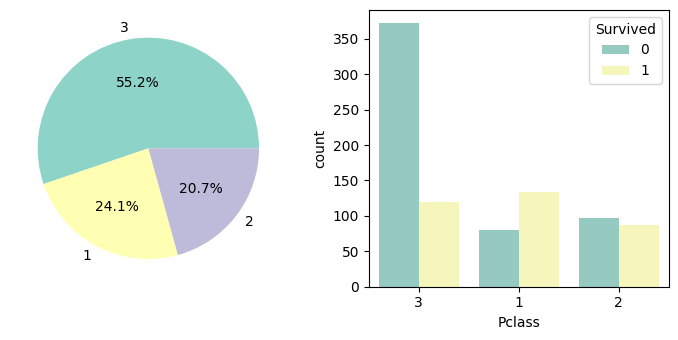

In [170]:
fig, axes = plt.subplots(1,2)
axes[0].pie(Pclass_count, labels=Pclass_count_index, autopct='%.1f%%')
sns.countplot(cleaned_original_data, x='Pclass', hue='Survived', ax=axes[1])
plt.show()

从图中可以看出大多数乘客是三等票，约55%左右，但是死亡率却是最高，而一等座乘客的死亡率小于生还的概率。

#### 乘客的性别与幸存者的关系

In [143]:
Sex_counts = cleaned_original_data['Sex'].value_counts()
Sex_counts_index = Sex_counts.index

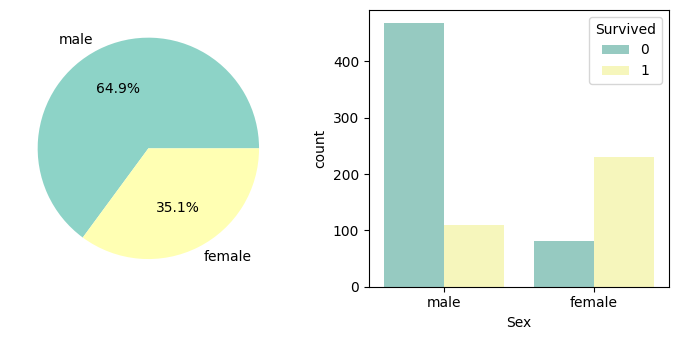

In [167]:
fig, axes = plt.subplots(1,2)
axes[0].pie(Sex_counts, labels=Sex_counts_index, autopct='%.1f%%')
sns.countplot(cleaned_original_data, x='Sex', hue='Survived', ax=axes[1])
plt.show()

从是否幸存与性别之间的柱状图来看，男性乘客中遇难比例更大，女性乘客中幸存比例更大。

#### 登船港口与是否幸存的关系

In [163]:
Embarked_counts = cleaned_original_data['Embarked'].value_counts()
Embarked_counts_index = Embarked_counts.index

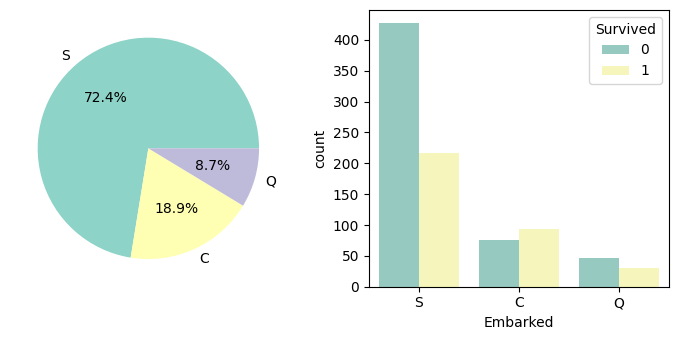

In [165]:
fig, axes = plt.subplots(1,2)
axes[0].pie(Embarked_counts, labels=Embarked_counts_index, autopct='%.1f%%')
sns.countplot(cleaned_original_data, x='Embarked', hue='Survived', ax=axes[1])
plt.show()

从是否幸存与登船港口之间的柱状图来看，瑟堡登船的乘客，幸存数量大于遇难数量，而皇后镇和南安普敦则相反。

#### 家庭成员数量与是否幸存的关系

In [171]:
relative_counts = cleaned_original_data['relative'].value_counts()
relative_counts_index = relative_counts.index

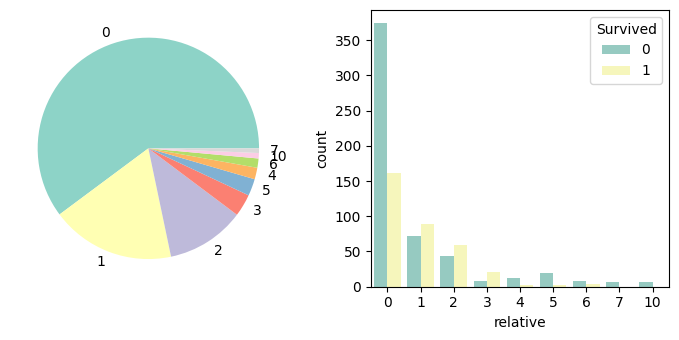

In [176]:
fig, axes = plt.subplots(1,2)
axes[0].pie(relative_counts, labels=relative_counts_index)
sns.countplot(cleaned_original_data, x='relative', hue='Survived', ax=axes[1])
plt.show()

从是否幸存与乘客家庭成员之间的柱状图来看，独身的乘客中遇难的多于幸存的。从有携带家庭成员的乘客来看，家庭成员在1～3位之间的幸存人数超过遇难人数，但同乘家庭成员超过3位后，遇难的更多。

# 使用逻辑回归预测

In [13]:
import seaborn as sns

In [14]:
import statsmodels.api as sm

首先建立一个新的数据集，仅包含我们需要预测的变量。

In [15]:
predicted_data_titanic = cleaned_original_data.drop(labels=['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin','Name'], axis=1)
predicted_data_titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relative
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


首先将分类变量转变为数值变量

In [16]:
predicted_data_titanic = pd.get_dummies(predicted_data_titanic, columns=['Sex', 'Embarked'], dtype=int, drop_first=True)
predicted_data_titanic.head(5)

,Survived,Pclass,Age,Fare,relative,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [17]:
predicted_data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         712 non-null    float64
 3   Fare        889 non-null    float64
 4   relative    889 non-null    int64  
 5   Sex_male    889 non-null    int32  
 6   Embarked_Q  889 non-null    int32  
 7   Embarked_S  889 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 52.1 KB


In [18]:
predicted_data_titanic['Age'] = predicted_data_titanic['Age'].fillna(predicted_data_titanic['Age'].mean())
predicted_data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   Fare        889 non-null    float64
 4   relative    889 non-null    int64  
 5   Sex_male    889 non-null    int32  
 6   Embarked_Q  889 non-null    int32  
 7   Embarked_S  889 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 52.1 KB


确定自变量和因变量

In [19]:
y = predicted_data_titanic['Survived']
x = predicted_data_titanic.drop('Survived', axis=1)

查看自变量之间的相关性

<Axes: >

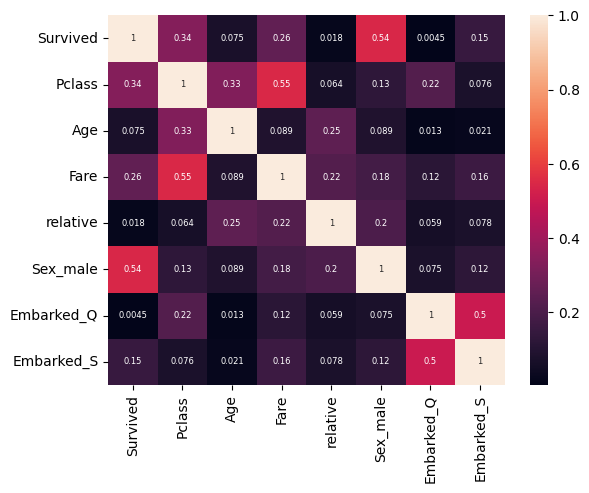

In [20]:
sns.heatmap(predicted_data_titanic.corr().abs(), annot=True, annot_kws={'fontsize': 6})

根据返回的结果可以看出，不同变量间的系数没有大于0.8，因此不用删除其他变量。

导入常数

In [21]:
x = sm.add_constant(x)

建立逻辑回归模型

In [22]:
predicted_data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   Fare        889 non-null    float64
 4   relative    889 non-null    int64  
 5   Sex_male    889 non-null    int32  
 6   Embarked_Q  889 non-null    int32  
 7   Embarked_S  889 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 52.1 KB


In [23]:
predicted_data_titanic.describe()

,Survived,Pclass,Age,Fare,relative,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,32.096681,0.906637,0.649044,0.086614,0.724409
std,0.486260,0.834700,12.968346,49.697504,1.614703,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.642093,14.454200,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000,1.000000,1.000000,1.000000


In [24]:
result = sm.Logit(y, x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.442008
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            7
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.3356
Time:                        13:47:53   Log-Likelihood:                -392.95
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.088e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2697      0.565      9.333      0.000       4.163       6.376
Pclass        -1.0926      0.143     -7.626      0.000      -1.373      -0.812
Age           -0.0393      0.008     -5.008      0.000      -0.055      -0.024
Fare           0.0021      0.002      0.874      0.382      -0.003       0.007
relative      -0.2212      0.068     -3.245      0.001      -0.355      -0.088
Sex_male      -2.7380      0.200    -13.702      0.000      -3.130      -2.346
Embarked_Q    -0.0672      0.380     -0.177      0.860      -0.813       0.678
Embarked_S    -0.4325      0.236     -1.829      0.067      -0.896       0.031
==============================================================================
"""

根据返回的结果显示，票的价格和上传地点都不能很好预测数据，因此可以去除这两个变量。

In [26]:
x = x.drop(['Embarked_Q', 'Embarked_S', 'Fare'], axis=1)

In [27]:
result = sm.Logit(y, x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.445341
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            4
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.3306
Time:                        13:48:13   Log-Likelihood:                -395.91
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 2.446e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2230      0.482     10.839      0.000       4.279       6.167
Pclass        -1.1695      0.120     -9.780      0.000      -1.404      -0.935
Age           -0.0397      0.008     -5.100      0.000      -0.055      -0.024
relative      -0.2176      0.064     -3.374      0.001      -0.344      -0.091
Sex_male      -2.7778      0.198    -14.025      0.000      -3.166      -2.390
==============================================================================
"""

In [28]:
np.exp(-1.1695)

0.3105221635384522

In [29]:
np.exp(-0.0387)

0.9620392776422207

In [30]:
np.exp(-0.2176)

0.8044471561818398

In [31]:
np.exp(-2.7778)

0.0621751423369346

根据返回的结果显示，随着船舱等级的降低，活下来的概率会降低31.05%，大概率和乘客的贫富差距有关；随着年龄的增加，活下来的概率会降低约96.2%，可能与对小孩的保护有关；     
带的亲属朋友越多，活下来的概率降低约21.8%，可能如果亲属朋友遇难，自身活下去的信念也会降低；男性存活下来的概率相对女性降低27.8%，可能与女性和小孩先行的理念有关。

# 数据预测

In [32]:
titanic_predict = pd.read_csv("D:\\练习\\项目实战 _ 用逻辑回归预测泰坦尼克号幸存情况\\titanic_test.csv")

In [33]:
titanic_predict.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
cleaned_titanic_predict = titanic_predict.copy()

In [45]:
cleaned_titanic_predict = cleaned_titanic_predict.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [46]:
cleaned_titanic_predict['relative'] = cleaned_titanic_predict['SibSp'] + cleaned_titanic_predict['Parch']
cleaned_titanic_predict = cleaned_titanic_predict.drop(['SibSp', 'Parch'], axis=1)
cleaned_titanic_predict.head()

,Pclass,Sex,Age,Fare,Embarked,relative
0,3,male,34.5,7.8292,Q,0
1,3,female,47.0,7.0000,S,1
2,2,male,62.0,9.6875,Q,0
3,3,male,27.0,8.6625,S,0
4,3,female,22.0,12.2875,S,2


In [47]:
cleaned_titanic_predict = pd.get_dummies(cleaned_titanic_predict, columns=['Sex', 'Embarked'], dtype=int, drop_first=True)

In [48]:
cleaned_titanic_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         332 non-null    float64
 2   Fare        417 non-null    float64
 3   relative    418 non-null    int64  
 4   Sex_male    418 non-null    int32  
 5   Embarked_Q  418 non-null    int32  
 6   Embarked_S  418 non-null    int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 18.1 KB


In [50]:
cleaned_titanic_predict = cleaned_titanic_predict.fillna(cleaned_titanic_predict['Age'].mean())

In [51]:
cleaned_titanic_predict = cleaned_titanic_predict.dropna(subset=['Fare'])

In [52]:
cleaned_titanic_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   Fare        418 non-null    float64
 3   relative    418 non-null    int64  
 4   Sex_male    418 non-null    int32  
 5   Embarked_Q  418 non-null    int32  
 6   Embarked_S  418 non-null    int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 18.1 KB


In [61]:
cleaned_titanic_predict.head()

,Pclass,Age,Fare,relative,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,7.8292,0,1,1,0
1,3,47.0,7.0000,1,0,0,1
2,2,62.0,9.6875,0,1,1,0
3,3,27.0,8.6625,0,1,0,1
4,3,22.0,12.2875,2,0,0,1


In [53]:
predicted_data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   Fare        889 non-null    float64
 4   relative    889 non-null    int64  
 5   Sex_male    889 non-null    int32  
 6   Embarked_Q  889 non-null    int32  
 7   Embarked_S  889 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 52.1 KB


In [69]:
x_predict = cleaned_titanic_predict
x_predict = sm.add_constant(x_predict)
x_predict = x_predict.drop(['Fare', 'Embarked_Q', 'Embarked_S'], axis=1)

In [72]:
predict_result = result.predict(x_predict)
predict_result

0      0.080768
1      0.409123
2      0.086798
3      0.105795
4      0.600270
         ...   
413    0.094127
414    0.924587
415    0.069743
416    0.094127
417    0.063008
Length: 418, dtype: float64

存活率大于50%的人们

In [73]:
predict_result[predict_result > 0.5]

4      0.600270
6      0.628171
8      0.731141
12     0.948997
14     0.877765
         ...   
409    0.761391
410    0.625642
411    0.914365
412    0.646507
414    0.924587
Length: 158, dtype: float64